## DFO Nutrient Comparison

In [2]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime
import glob
import gsw
import cmocean

%matplotlib inline

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as m:
    tmask=m.variables['tmask'][0,:,:,:]

In [10]:
fHC=nc.Dataset('/results/SalishSea/spinup.201905/01jan15/SalishSea_1h_20150101_20150101_grid_T.nc')
fL=nc.Dataset('/data/sallen/results/MEOPAR/01jan15_SMELT/SalishSea_1h_20150101_20150105_grid_T_20150101-20150101.nc')
fHCV=nc.Dataset('/results/SalishSea/spinup.201905/01jan15/SalishSea_1h_20150101_20150101_grid_V.nc')
fLV=nc.Dataset('/data/sallen/results/MEOPAR/01jan15_SMELT/SalishSea_1h_20150101_20150105_grid_V_20150101-20150101.nc')

In [11]:
fLV.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthv', 'depthv_bounds', 'vomecrty', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds'])

In [8]:
np.max(fHC.variables['votemper'][:,:,:,:]-fL.variables['votemper'][:,:,:,:])

0.029694557

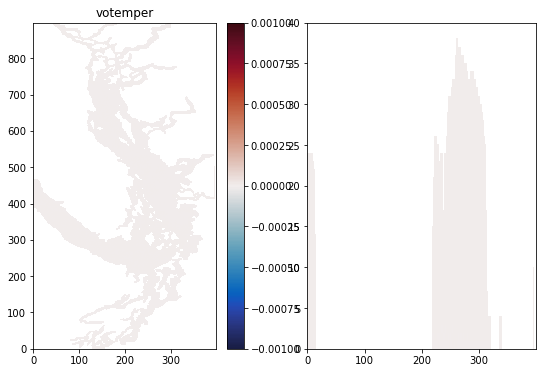

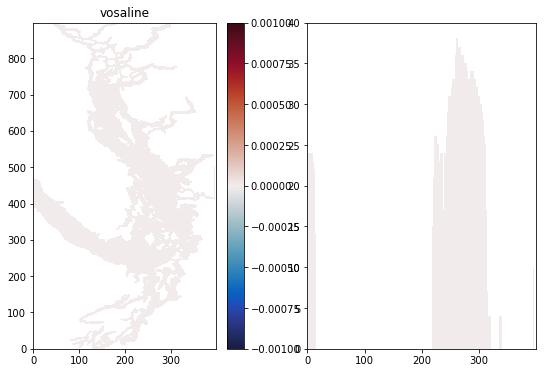

In [7]:
for var in ('votemper', 'vosaline'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHC.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)

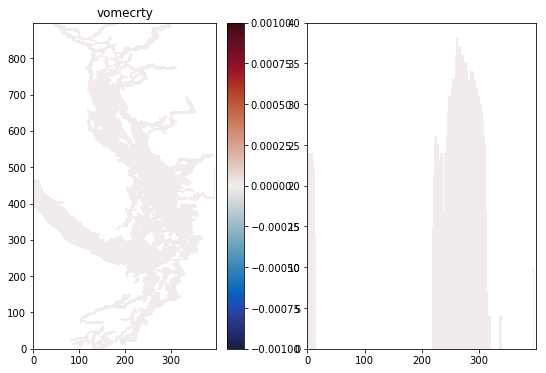

In [12]:
for var in ('vomecrty',):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHCV.variables[var][0,0,:,:]-fLV.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHCV.variables[var][0,:,450,:]-fLV.variables[var][0,:,450,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)

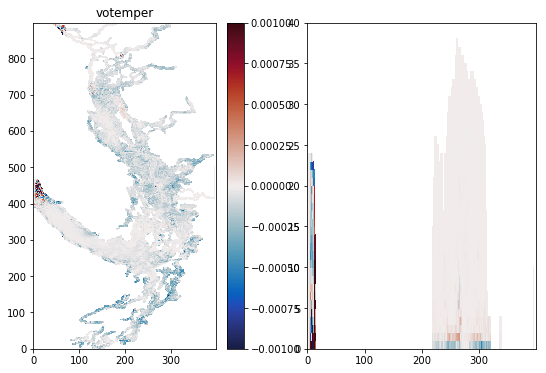

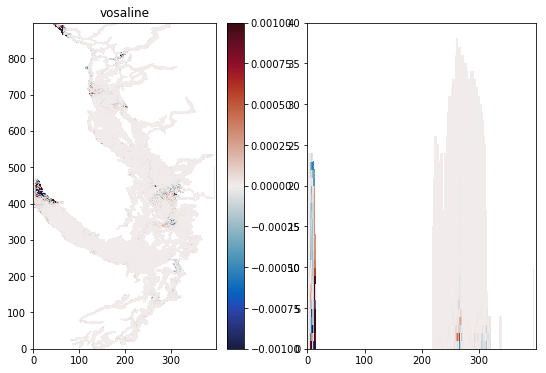

In [9]:
for var in ('votemper', 'vosaline'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC.variables[var][23,0,:,:]-fL.variables[var][23,0,:,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHC.variables[var][23,:,450,:]-fL.variables[var][23,:,450,:]),cmap=cmocean.cm.balance,vmin=-.001,vmax=.001)

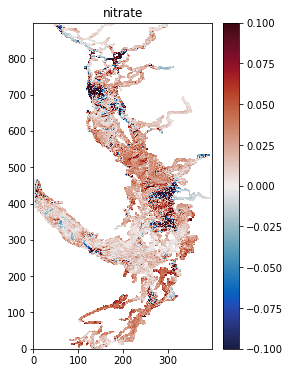

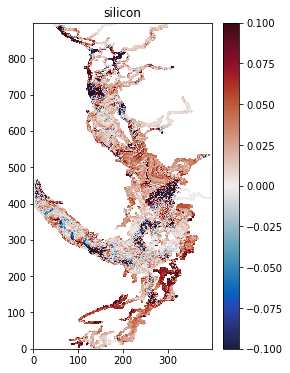

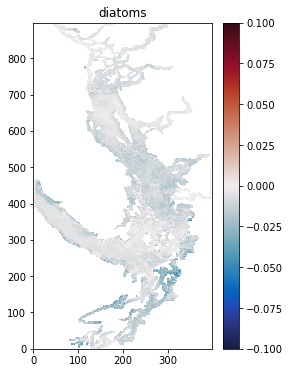

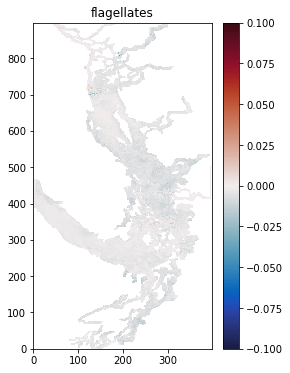

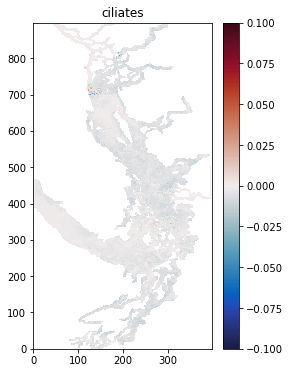

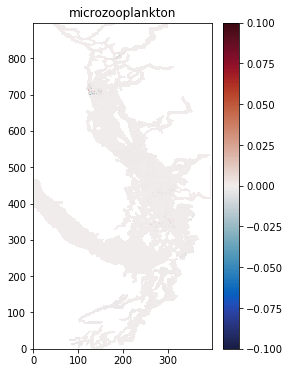

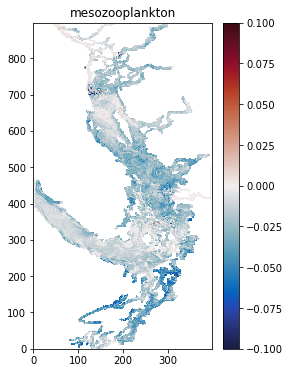

In [9]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(figsize=(4,6))
    m=ax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC.variables[var][23,0,:,:]-fL.variables[var][23,0,:,:]),cmap=cmocean.cm.balance,vmin=-.1,vmax=.1)
    fig.colorbar(m,ax=ax)
    ax.set_title(var)